In [ ]:
import pandas as pd
pd.__version__

'1.1.5'

In [ ]:
df = pd.read_csv('get-data(1).csv')

In [ ]:
df

status  ...           data__timestamp
0         1.0  ...  2021-05-06T21:09:00.000Z
1         NaN  ...                       NaN
2         NaN  ...                       NaN
3         NaN  ...                       NaN
4         NaN  ...                       NaN
...       ...  ...                       ...
48255     NaN  ...                       NaN
48256     NaN  ...                       NaN
48257     NaN  ...                       NaN
48258     NaN  ...                       NaN
48259     NaN  ...                       NaN

[48260 rows x 4 columns]

In [ ]:
type(df.iloc[:,-2])

pandas.core.series.Series

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
#mpl.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
#mpl.rc('text', usetex=True)
mpl.rc('font', size=20)
mpl.rc('figure', figsize=(20, 10))

In [ ]:
ppg_main=df.iloc[:,-2].to_numpy()

In [ ]:
ppg_main[0:80]

array([  -7,    0,   63,  -66,    1,   48,  -66,    2,  -14,  -67,    3,
        118,  -67,    4,    2,  -67,    5,  124,  -68,    6,  -34,  -69,
          7,   89,  -69,    8,   28,  -69,    9,   -3,  -70,   10,   -6,
        -70,   11,    6,  -69,   12,   21,  -69,   13,   72,  -69,   14,
        -99,  -69,   15,    0,  -68,   16, -116,  -68,   17,  100,  -67,
         18,   31,  -66,   19,   97,  -66,   20,   88,  -66,   21,  -92,
        -66,   22,   11,  -65,   23,  107,  -65,   24,  -27,   54,   -7,
          0,   98,  -64])

In [ ]:
ppg_main[76+76]

-7

In [ ]:
ppg_main[0::76]

array([-7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7, -7,
       -7, -7, -7, -7, -7

In [ ]:
import numpy as np
len(np.where((ppg_main)==-7)[0])

703

In [ ]:
ppg_with_ind=[]
ppg=[]
for i in range(len(ppg_main)):
  if i%76!=0:
      ppg_with_ind.append(ppg_main[i])
for i in range(len(ppg_with_ind)):
  if i%3!=0:
    ppg.append(ppg_with_ind[i])

In [ ]:
ppg_with_ind=np.asarray(ppg_with_ind)
ppg=np.asarray(ppg)

In [ ]:
import sys
type((6).to_bytes(1, sys.byteorder))

bytes

In [ ]:
!pip install bitstring

     |████████████████████████████████| 204kB 6.9MB/s 
  Created wheel for bitstring: filename=bitstring-3.1.7-cp37-none-any.whl size=37949 sha256=df400c65a3eeaf9e6b3af73c219f520dc73f33fe04f58b73e4edf8a491310eeb
  Stored in directory: /root/.cache/pip/wheels/b8/27/f0/8373e26b7de57db03dc18aaaebdd8c26a99da882416f762979
Successfully built bitstring


In [ ]:
(0).to_bytes(1,'big',signed=True)

b'\x00'

In [ ]:

from bitstring import BitStream, BitArray
def DecimalToBinary(num):

  if num >= 0:
    dec=bin(num).lstrip('0b')

  if num<0:
    dec=num.to_bytes(1,'big',signed=True)
    dec=BitArray(bytes=dec).bin
  if len(dec)<8:
    diff=8-len(dec)
    for i in range(diff):
      dec='0'+dec
    # print(dec)
  return dec



In [ ]:
ppg_bytes=[]
for i in range(0,len(ppg)-1,2):
  ppg_bytes.append(DecimalToBinary(ppg[i+1].item())+DecimalToBinary(ppg[i].item()))
# ppg_bytes=np.asarray(ppg_bytes)

In [ ]:
ppg

array([  63,  -66,   48, ..., -111,  117,  -61])

In [ ]:
ppg_bytes[0],ppg_bytes[1]

('1011111000111111', '1011111000110000')

## As Signed 16-bit samples

In [ ]:
def as_signed_big(binary_str):
    # This time, taking advantage of positional args and default values.
    as_bytes = int(binary_str, 2).to_bytes(2, 'big')
    return int.from_bytes(as_bytes, 'big', signed=True)


In [ ]:
ppg_sig=[]
for i in range(len(ppg_bytes)):
  ppg_sig.append(as_signed_big(ppg_bytes[i]))
ppg_sig=np.asarray(ppg_sig)

In [ ]:
int.from_bytes(int(ppg_bytes[0], 2).to_bytes(2, 'big'), 'big', signed=True)

-16833

In [ ]:
len(ppg_sig)

15875

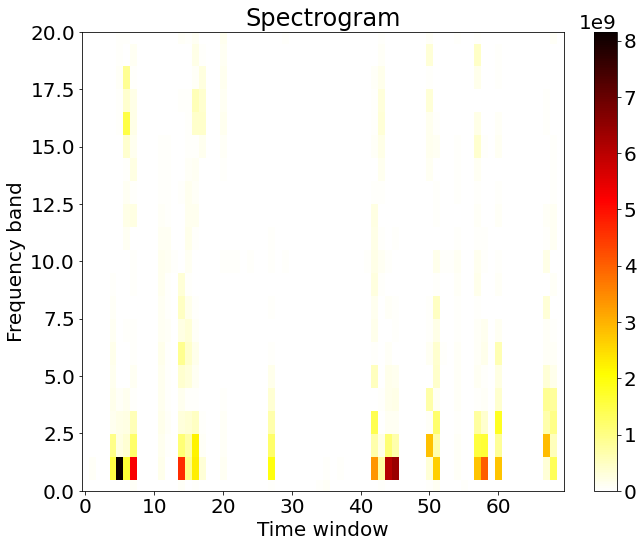

In [ ]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(ppg_sig,25)

plt.figure(figsize=(10, 8))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.ylim(0,20)
plt.tight_layout()
plt.colorbar()

In [ ]:
freqs, psd = signal.welch(ppg_sig)

plt.figure(figsize=(10, 8))
plt.semilogx(freqs*25, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

In [ ]:
freqs

array([0.        , 0.00390625, 0.0078125 , 0.01171875, 0.015625  ,
       0.01953125, 0.0234375 , 0.02734375, 0.03125   , 0.03515625,
       0.0390625 , 0.04296875, 0.046875  , 0.05078125, 0.0546875 ,
       0.05859375, 0.0625    , 0.06640625, 0.0703125 , 0.07421875,
       0.078125  , 0.08203125, 0.0859375 , 0.08984375, 0.09375   ,
       0.09765625, 0.1015625 , 0.10546875, 0.109375  , 0.11328125,
       0.1171875 , 0.12109375, 0.125     , 0.12890625, 0.1328125 ,
       0.13671875, 0.140625  , 0.14453125, 0.1484375 , 0.15234375,
       0.15625   , 0.16015625, 0.1640625 , 0.16796875, 0.171875  ,
       0.17578125, 0.1796875 , 0.18359375, 0.1875    , 0.19140625,
       0.1953125 , 0.19921875, 0.203125  , 0.20703125, 0.2109375 ,
       0.21484375, 0.21875   , 0.22265625, 0.2265625 , 0.23046875,
       0.234375  , 0.23828125, 0.2421875 , 0.24609375, 0.25      ,
       0.25390625, 0.2578125 , 0.26171875, 0.265625  , 0.26953125,
       0.2734375 , 0.27734375, 0.28125   , 0.28515625, 0.28906

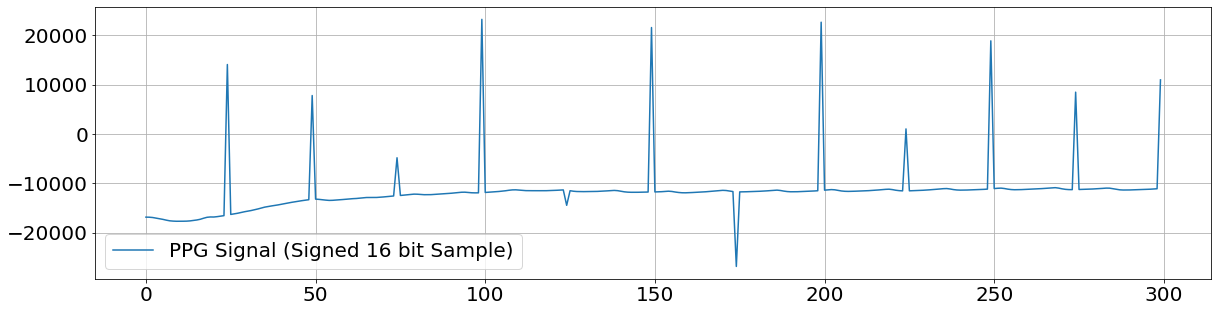

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(ppg_sig[0:300],label='PPG Signal (Signed 16 bit Sample)')
plt.grid()
plt.legend()

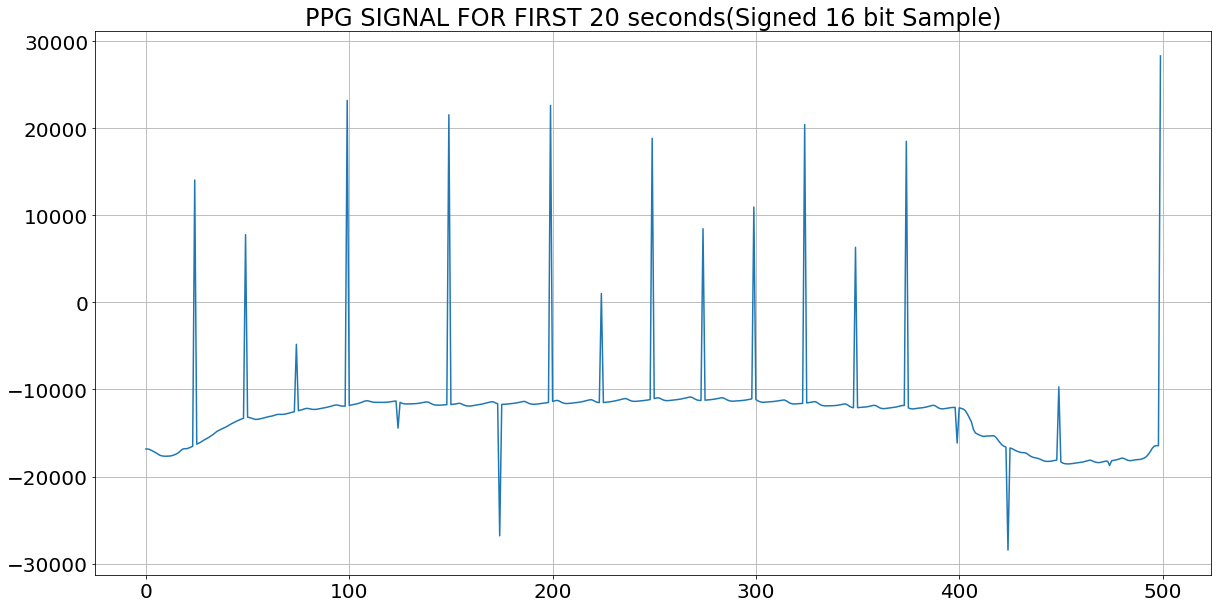

In [ ]:
plt.title('PPG SIGNAL FOR FIRST 20 seconds(Signed 16 bit Sample)')
plt.plot(ppg_sig[0:int(20 * 25)])
plt.grid()


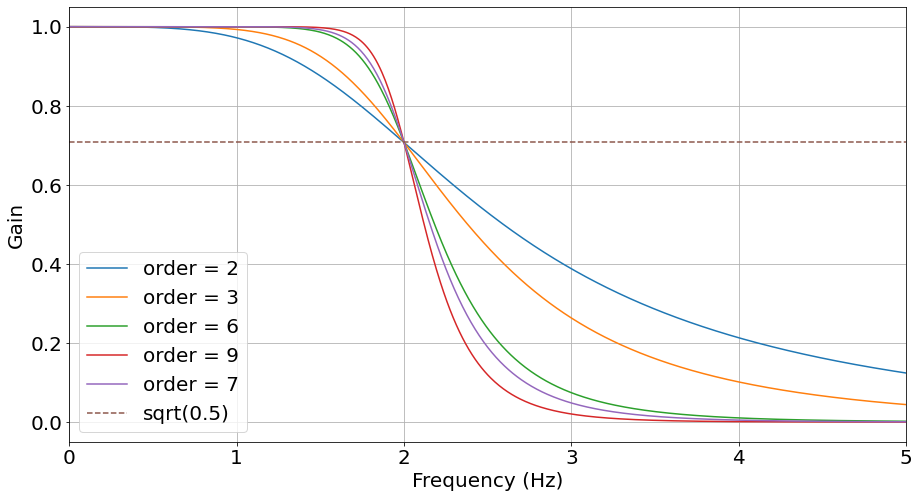

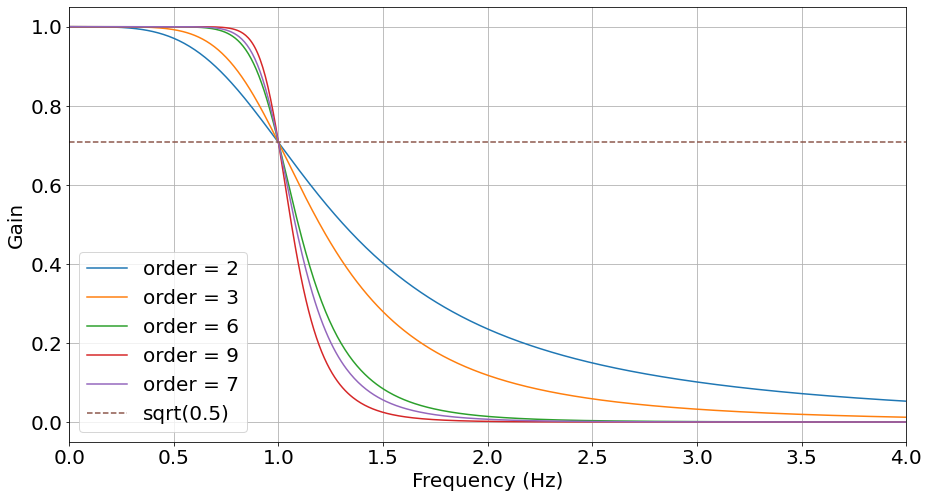

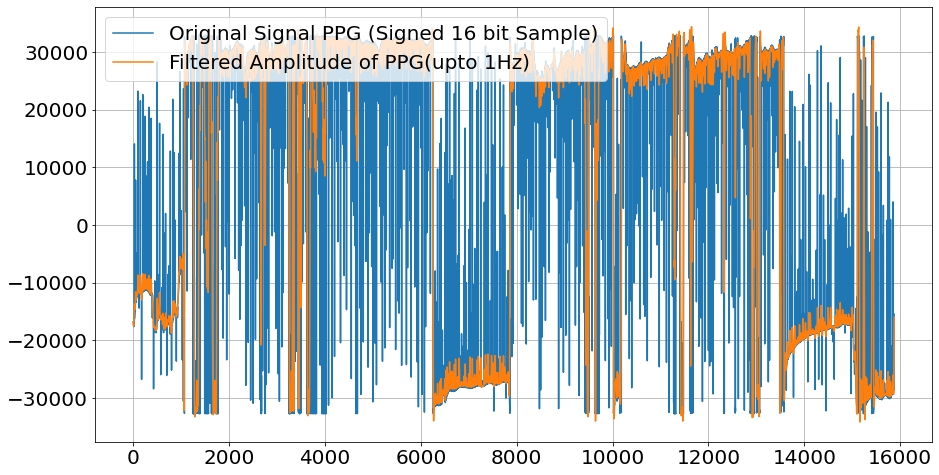

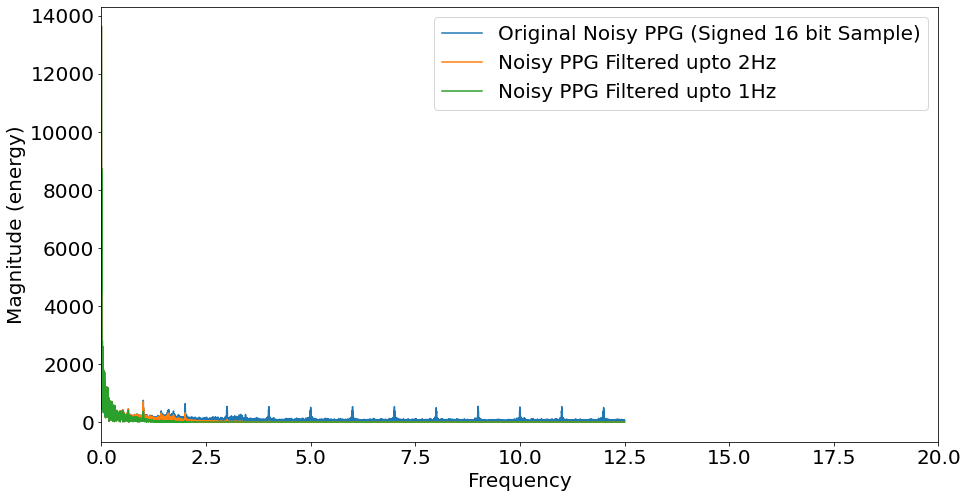

In [ ]:
from scipy.signal import butter, lfilter,filtfilt

def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, [high], btype='low')
    return b, a

def butter_lowpass_filter(data, highcut, fs, order=5):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


def run(x,T,fs,highcut,label,size=(15,8)):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # fs,highcut:-Sample rate and desired cutoff frequencies (in Hz).


    # Plot the frequency response for a few different orders.
    plt.figure(figsize=size)
    plt.clf()
    for order in [2, 3, 6, 9, 7]:
        b, a = butter_lowpass(highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.xlim([0,highcut+3])
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    # T is end time

    plt.figure(figsize=size)
    plt.clf()
    plt.plot(x, label='Original Signal PPG (Signed 16 bit Sample)')

    y = butter_lowpass_filter(x, highcut, fs, order=2)
    plt.plot(y, label=label)
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

    return y

t_s=1/25
dt=1/25
ppg_lp_filt_2=run(ppg_sig,len(ppg_sig)*dt,25,2,'Filtered Amplitude of PPG(upto 2Hz)')
ppg_lp_filt_1=run(ppg_sig,len(ppg_sig)*dt,25,1,'Filtered Amplitude of PPG(upto 1Hz)')
plt.figure(figsize=(15,8))
plt.magnitude_spectrum(ppg_sig,1/t_s,label='Original Noisy PPG (Signed 16 bit Sample)')
plt.xlim([0,20])
b=plt.magnitude_spectrum(ppg_lp_filt_2,25,label='Noisy PPG Filtered upto 2Hz')
c=plt.magnitude_spectrum(ppg_lp_filt_1,25,label='Noisy PPG Filtered upto 1Hz')
plt.legend()

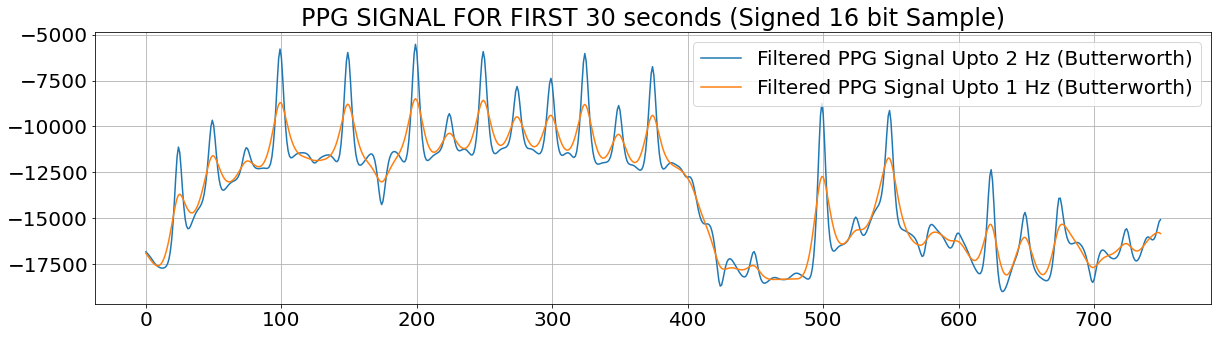

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 30 seconds (Signed 16 bit Sample)')
# plt.plot(ppg_sig[0:30*25],label='Original Noisy PPG Signal')
plt.plot(ppg_lp_filt_2[0:30*25],label='Filtered PPG Signal Upto 2 Hz (Butterworth)')
plt.plot(ppg_lp_filt_1[0:30*25],label='Filtered PPG Signal Upto 1 Hz (Butterworth)')
plt.grid()
plt.legend()

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 60 seconds (Signed 16 bit Sample)')
plt.plot(ppg_sig[0:60*25],label='Original Noisy PPG Signal')
plt.plot(ppg_lp_filt_2[0:60*25],label='Filtered PPG Signal Upto 2 Hz (Butterworth)')
plt.plot(ppg_lp_filt_1[0:60*25],label='Filtered PPG Signal Upto 1 Hz (Butterworth)')
plt.grid()
plt.legend()

In [ ]:
!pip install chart-studio

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

trace1 = go.Scatter(
    x=list(range(len(ppg_sig))),
    y=ppg_sig,
    mode='lines',
    name='Noisy PPG Data (Signed 16 bit Sample)'
)

layout = go.Layout(
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
fig.show()

fc = 0.1 #1.25Hz
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)

sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)


new_signal = np.convolve(ppg_sig, sinc_func)

trace1 = go.Scatter(
    x=list(range(len(new_signal))),
    y=new_signal,
    mode='lines',
    name='Low-Pass Filter',
    marker=dict(
        color='#C54C82'
    )
)

layout = go.Layout(
    title='Low-Pass Filter (Signed 16 bit Sample) (upto 1.25Hz)',
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
fig.show()

In [ ]:
fc = 0.1
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)

sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = np.blackman(N)
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

# reverse function
sinc_func = -sinc_func
sinc_func[int((N - 1) / 2)] += 1

new_signal = np.convolve(ppg_sig, sinc_func)

trace1 = go.Scatter(
    x=list(range(len(new_signal))),
    y=new_signal,
    mode='lines',
    name='High-Pass Filter',
    marker=dict(
        color='#424242'
    )
)

layout = go.Layout(
    title='High-Pass Filtered PPG signal (Signed 16 bit Sample) from 1.25Hz',
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
fig.show()

In [ ]:
fL = 0.001 # 0.25Hz
fH = 0.2 # 5Hz
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # Make sure that N is odd.
n = np.arange(N)

# low-pass filter
hlpf = np.sinc(2 * fH * (n - (N - 1) / 2.))
hlpf *= np.blackman(N)
hlpf = hlpf / np.sum(hlpf)

# high-pass filter
hhpf = np.sinc(2 * fL * (n - (N - 1) / 2.))
hhpf *= np.blackman(N)
hhpf = hhpf / np.sum(hhpf)
hhpf = -hhpf
hhpf[int((N - 1) / 2)] += 1

h = np.convolve(hlpf, hhpf)
new_signal = np.convolve(ppg_sig, h)

trace1 = go.Scatter(
    x=list(range(len(new_signal))),
    y=new_signal,
    mode='lines',
    name='Band-Pass Filter',
    marker=dict(
        color='#BB47BE'
    )
)

layout = go.Layout(
    title='Band-Pass Filtered PPG signal (0.25Hz to 5Hz) (Signed 16 bit Sample)',
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
fig.show()

In [ ]:
def butter_lowpass(cutoff, sample_rate, order=2):
    '''standard lowpass filter.

    Function that defines standard Butterworth lowpass filter

    Parameters
    ----------
    cutoff : int or float
        frequency in Hz that acts as cutoff for filter.
        All frequencies above cutoff are filtered out.

    sample_rate : int or float
        sample rate of the supplied signal

    order : int
        filter order, defines the strength of the roll-off
        around the cutoff frequency. Typically orders above 6
        are not used frequently.
        default: 2

    Returns
    -------
    out : tuple
        numerator and denominator (b, a) polynomials
        of the defined Butterworth IIR filter.

    Examples
    --------
    >>> b, a = butter_lowpass(cutoff = 2, sample_rate = 100, order = 2)
    >>> b, a = butter_lowpass(cutoff = 4.5, sample_rate = 12.5, order = 5)
    '''
    nyq = 0.5 * sample_rate
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_highpass(cutoff, sample_rate, order=2):
    '''standard highpass filter.

    Function that defines standard Butterworth highpass filter

    Parameters
    ----------
    cutoff : int or float
        frequency in Hz that acts as cutoff for filter.
        All frequencies below cutoff are filtered out.

    sample_rate : int or float
        sample rate of the supplied signal

    order : int
        filter order, defines the strength of the roll-off
        around the cutoff frequency. Typically orders above 6
        are not used frequently.
        default : 2

    Returns
    -------
    out : tuple
        numerator and denominator (b, a) polynomials
        of the defined Butterworth IIR filter.

    Examples
    --------
    we can specify the cutoff and sample_rate as ints or floats.

    >>> b, a = butter_highpass(cutoff = 2, sample_rate = 100, order = 2)
    >>> b, a = butter_highpass(cutoff = 4.5, sample_rate = 12.5, order = 5)
    '''
    nyq = 0.5 * sample_rate
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a


def butter_bandpass(lowcut, highcut, sample_rate, order=2):
    '''standard bandpass filter.
    Function that defines standard Butterworth bandpass filter.
    Filters out frequencies outside the frequency range
    defined by [lowcut, highcut].

    Parameters
    ----------
    lowcut : int or float
        Lower frequency bound of the filter in Hz

    highcut : int or float
        Upper frequency bound of the filter in Hz

    sample_rate : int or float
        sample rate of the supplied signal

    order : int
        filter order, defines the strength of the roll-off
        around the cutoff frequency. Typically orders above 6
        are not used frequently.
        default : 2

    Returns
    -------
    out : tuple
        numerator and denominator (b, a) polynomials
        of the defined Butterworth IIR filter.

    Examples
    --------
    we can specify lowcut, highcut and sample_rate as ints or floats.

    >>> b, a = butter_bandpass(lowcut = 1, highcut = 6, sample_rate = 100, order = 2)
    >>> b, a = butter_bandpass(lowcut = 0.4, highcut = 3.7, sample_rate = 72.6, order = 2)
    '''
    nyq = 0.5 * sample_rate
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def filter_signal(data, cutoff, sample_rate, order=2, filtertype='lowpass',
                  return_top = False):
    '''Apply the specified filter

    Function that applies the specified lowpass, highpass or bandpass filter to
    the provided dataset.

    Parameters
    ----------
    data : 1-dimensional numpy array or list
        Sequence containing the to be filtered data

    cutoff : int, float or tuple
        the cutoff frequency of the filter. Expects float for low and high types
        and for bandpass filter expects list or array of format [lower_bound, higher_bound]

    sample_rate : int or float
        the sample rate with which the passed data sequence was sampled

    order : int
        the filter order
        default : 2

    filtertype : str
        The type of filter to use. Available:
        - lowpass : a lowpass butterworth filter
        - highpass : a highpass butterworth filter
        - bandpass : a bandpass butterworth filter
        - notch : a notch filter around specified frequency range
        both the highpass and notch filter are useful for removing baseline wander. The notch
        filter is especially useful for removing baseling wander in ECG signals.


    Returns
    -------
    out : 1d array
        1d array containing the filtered data

    Examples
    --------
    >>> import numpy as np
    >>> import heartpy as hp

    Using standard data provided

    >>> data, _ = hp.load_exampledata(0)

    We can filter the signal, for example with a lowpass cutting out all frequencies
    of 5Hz and greater (with a sloping frequency cutoff)

    >>> filtered = filter_signal(data, cutoff = 5, sample_rate = 100.0, order = 3, filtertype='lowpass')
    >>> print(np.around(filtered[0:6], 3))
    [530.175 517.893 505.768 494.002 482.789 472.315]

    Or we can cut out all frequencies below 0.75Hz with a highpass filter:

    >>> filtered = filter_signal(data, cutoff = 0.75, sample_rate = 100.0, order = 3, filtertype='highpass')
    >>> print(np.around(filtered[0:6], 3))
    [-17.975 -28.271 -38.609 -48.992 -58.422 -67.902]

    Or specify a range (here: 0.75 - 3.5Hz), outside of which all frequencies
    are cut out.

    >>> filtered = filter_signal(data, cutoff = [0.75, 3.5], sample_rate = 100.0,
    ... order = 3, filtertype='bandpass')
    >>> print(np.around(filtered[0:6], 3))
    [-12.012 -23.159 -34.261 -45.12  -55.541 -65.336]

    A 'Notch' filtertype is also available (see remove_baseline_wander).

    >>> filtered = filter_signal(data, cutoff = 0.05, sample_rate = 100.0, filtertype='notch')

    Finally we can use the return_top flag to only return the filter response that
    has amplitute above zero. We're only interested in the peaks, and sometimes
    this can improve peak prediction:

    >>> filtered = filter_signal(data, cutoff = [0.75, 3.5], sample_rate = 100.0,
    ... order = 3, filtertype='bandpass', return_top = True)
    >>> print(np.around(filtered[48:53], 3))
    [ 0.     0.     0.409 17.088 35.673]
    '''
    if filtertype.lower() == 'lowpass':
        b, a = butter_lowpass(cutoff, sample_rate, order=order)
    elif filtertype.lower() == 'highpass':
        b, a = butter_highpass(cutoff, sample_rate, order=order)
    elif filtertype.lower() == 'bandpass':
        assert type(cutoff) == tuple or list or np.array, 'if bandpass filter is specified, \
cutoff needs to be array or tuple specifying lower and upper bound: [lower, upper].'
        b, a = butter_bandpass(cutoff[0], cutoff[1], sample_rate, order=order)
    elif filtertype.lower() == 'notch':
        b, a = iirnotch(cutoff, Q = 0.005, fs = sample_rate)
    else:
        raise ValueError('filtertype: %s is unknown, available are: \
lowpass, highpass, bandpass, and notch' %filtertype)

    filtered_data = filtfilt(b, a, data)

    if return_top:
        return np.clip(filtered_data, a_min = 0, a_max = None)
    else:
        return filtered_data

In [ ]:
ppg_1_2_5_butter=filter_signal(ppg_sig,[1,2.5],25,order=2,filtertype='bandpass')
ppg_1_3_butter=filter_signal(ppg_sig,[1,3],25,order=2,filtertype='bandpass')
ppg_1_5_butter=filter_signal(ppg_sig,[1,5],25,order=2,filtertype='bandpass')

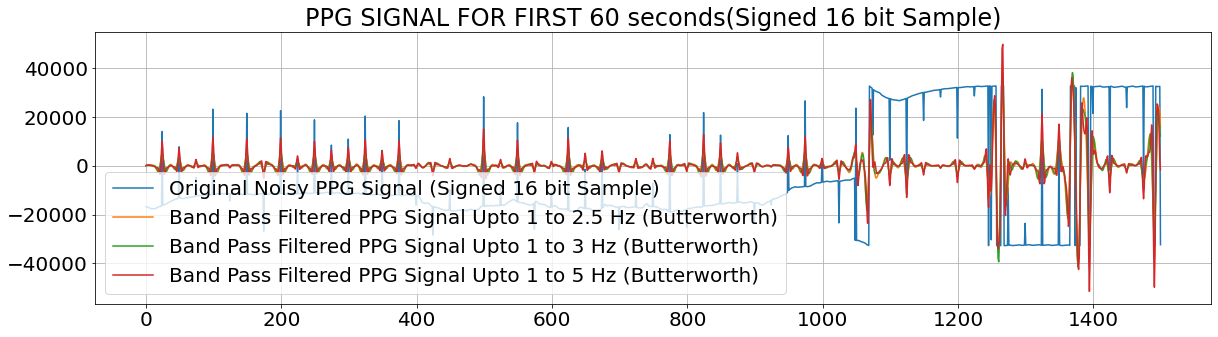

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 60 seconds(Signed 16 bit Sample)')
plt.plot(ppg_sig[0:60*25],label='Original Noisy PPG Signal (Signed 16 bit Sample)')
plt.plot(ppg_1_2_5_butter[0:60*25],label='Band Pass Filtered PPG Signal Upto 1 to 2.5 Hz (Butterworth)')
plt.plot(ppg_1_3_butter[0:60*25],label='Band Pass Filtered PPG Signal Upto 1 to 3 Hz (Butterworth)')
plt.plot(ppg_1_5_butter[0:60*25],label='Band Pass Filtered PPG Signal Upto 1 to 5 Hz (Butterworth)')
plt.grid()

plt.legend(loc='lower left')

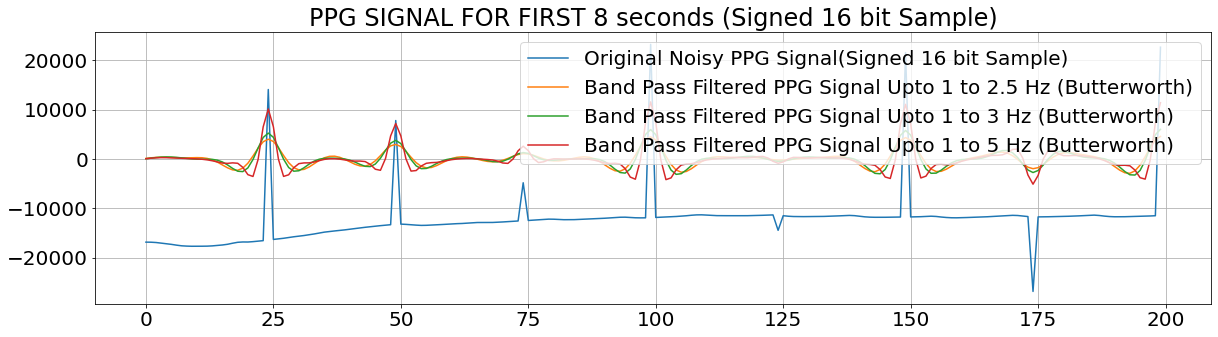

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 8 seconds (Signed 16 bit Sample)')
plt.plot(ppg_sig[0:8*25],label='Original Noisy PPG Signal(Signed 16 bit Sample)')
plt.plot(ppg_1_2_5_butter[0:8*25],label='Band Pass Filtered PPG Signal Upto 1 to 2.5 Hz (Butterworth)')
plt.plot(ppg_1_3_butter[0:8*25],label='Band Pass Filtered PPG Signal Upto 1 to 3 Hz (Butterworth)')
plt.plot(ppg_1_5_butter[0:8*25],label='Band Pass Filtered PPG Signal Upto 1 to 5 Hz (Butterworth)')
plt.grid()

plt.legend(loc='upper right')

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 8 seconds (Signed 16 bit Sample)')
plt.plot(ppg_sig[0:8*25],label='Original Noisy PPG Signal(Signed 16 bit Sample)')
plt.plot(ppg_1_3_butter[0:8*25],label='Band Pass Filtered PPG Signal Upto 1 to 3 Hz (Butterworth)')
plt.grid()

plt.legend(loc='upper right')

In [ ]:

from scipy.signal import butter, filtfilt, iirnotch, savgol_filter
def smooth_signal(data, sample_rate, window_length=None, polyorder=3):
    '''smooths given signal using savitzky-golay filter

    Function that smooths data using savitzky-golay filter using default settings.

    Functionality requested by Eirik Svendsen. Added since 1.2.4

    Parameters
    ----------
    data : 1d array or list
        array or list containing the data to be filtered

    sample_rate : int or float
        the sample rate with which data is sampled

    window_length : int or None
        window length parameter for savitzky-golay filter, see Scipy.signal.savgol_filter docs.
        Must be odd, if an even int is given, one will be added to make it uneven.
        default : 0.1  * sample_rate

    polyorder : int
        the order of the polynomial fitted to the signal. See scipy.signal.savgol_filter docs.
        default : 3

    Returns
    -------
    smoothed : 1d array
        array containing the smoothed data

    Examples
    --------
    Given a fictional signal, a smoothed signal can be obtained by smooth_signal():

    >>> x = [1, 3, 4, 5, 6, 7, 5, 3, 1, 1]
    >>> smoothed = smooth_signal(x, sample_rate = 2, window_length=4, polyorder=2)
    >>> np.around(smoothed[0:4], 3)
    array([1.114, 2.743, 4.086, 5.   ])

    If you don't specify the window_length, it is computed to be 10% of the
    sample rate (+1 if needed to make odd)
    >>> import heartpy as hp
    >>> data, timer = hp.load_exampledata(0)
    >>> smoothed = smooth_signal(data, sample_rate = 100)

    '''

    if window_length == None:
        window_length = sample_rate // 10

    if window_length % 2 == 0 or window_length == 0: window_length += 1

    smoothed = savgol_filter(data, window_length = window_length,
                             polyorder = polyorder)

    return smoothed

In [ ]:
ppg_smoothed=smooth_signal(ppg_sig,25,6)

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 60 seconds (Signed 16 bit Sample)')
plt.plot(ppg_sig[0:60*25],label='Original Noisy PPG Signal(Signed 16 bit Sample)')
plt.plot(ppg_smoothed[0:60*25],label='Smoothed PPG Signal using savitzky-golay filter')
plt.grid()

plt.legend(loc='upper right')

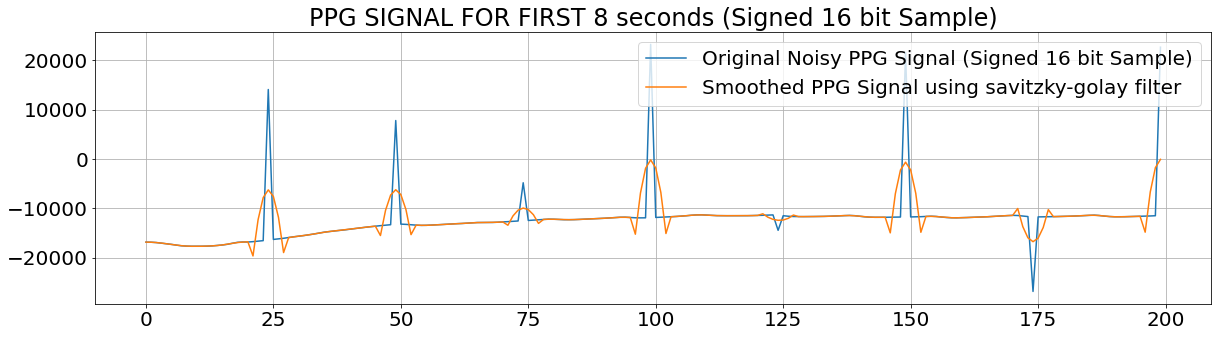

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 8 seconds (Signed 16 bit Sample)')
plt.plot(ppg_sig[0:8*25],label='Original Noisy PPG Signal (Signed 16 bit Sample)')
plt.plot(ppg_smoothed[0:8*25],label='Smoothed PPG Signal using savitzky-golay filter')
plt.grid()

plt.legend(loc='upper right')

In [ ]:
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt## A high pass filter allows frequencies higher than a cut-off value
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False, output='ba')
    return b, a## A low pass filter allows frequencies lower than a cut-off valuedef butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False, output='ba')
    return b, a
def notch_filter(cutoff, q):
    nyq = 0.5*fs
    freq = cutoff/nyq
    b, a = iirnotch(freq, q)
    return b, a

def highpass(data, fs, order=5):
    b,a = butter_highpass(cutoff_high, fs, order=order)
    x = lfilter(b,a,data)
    return x

def lowpass(data, fs, order =5):
    b,a = butter_lowpass(cutoff_low, fs, order=order)
    y = lfilter(b,a,data)
    return y

def notch(data, powerline, q):
    b,a = notch_filter(powerline,q)
    z = lfilter(b,a,data)
    return z

def final_filter(data, fs, order=5):
    b, a = butter_highpass(cutoff_high, fs, order=order)
    x = lfilter(b, a, data)
    d, c = butter_lowpass(cutoff_low, fs, order = order)
    y = lfilter(d, c, x)
    f, e = notch_filter(powerline, 30)
    z = lfilter(f, e, y)
    return z

fs = 25
cutoff_low = 1
cutoff_high=2.5
powerline = 6
order = 5

plt.figure(1)
ax1 = plt.subplot(211)
plt.plot(ppg_sig)
ax1.set_title("Noisy PPG signal (Signed 16 bit Sample)")

filter_signal = final_filter(ppg_sig, fs, order)
ax2 = plt.subplot(212)
plt.plot(filter_signal)
ax2.set_title("Clean PPG signal (Signed 16 bit Sample)")
plt.show()

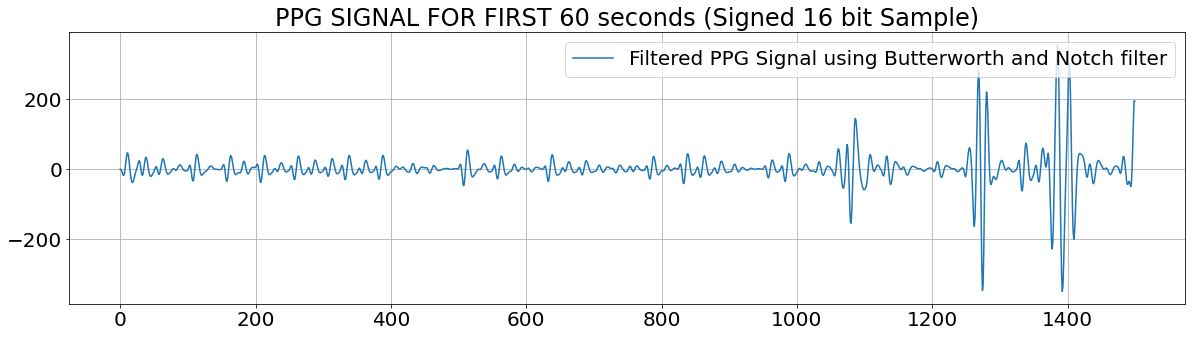

In [ ]:

filter_signal = final_filter(ppg_sig, fs, order)
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 60 seconds (Signed 16 bit Sample)')
# plt.plot(ppg_sig[0:60*25],label='Original Noisy PPG Signal')
plt.plot(filter_signal[0:60*25],label='Filtered PPG Signal using Butterworth and Notch filter')
plt.grid()

plt.legend(loc='upper right')

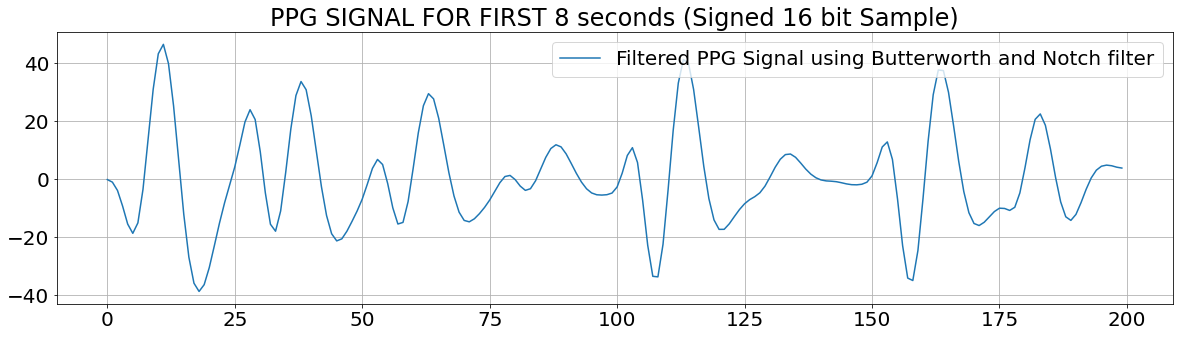

In [ ]:

filter_signal = final_filter(ppg_sig, fs, order)
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 8 seconds (Signed 16 bit Sample)')
# plt.plot(ppg_sig[0:8*25],label='Original Noisy PPG Signal')
plt.plot(filter_signal[0:8*25],label='Filtered PPG Signal using Butterworth and Notch filter')
plt.grid()

plt.legend(loc='upper right')

## As Unsigned 16-bit samples

In [ ]:
def as_unsigned_big(binary_str):
    # This time, taking advantage of positional args and default values.
    as_bytes = int(binary_str, 2).to_bytes(2, 'big')
    return int.from_bytes(as_bytes, 'big', signed=False)


In [ ]:
ppg_sig=[]
for i in range(len(ppg_bytes)):
  ppg_sig.append(as_unsigned_big(ppg_bytes[i]))
ppg_sig=np.asarray(ppg_sig)

In [ ]:
int.from_bytes(int(ppg_bytes[0], 2).to_bytes(2, 'big'), 'big', signed=False)

48703

In [ ]:
len(ppg_sig)

15875

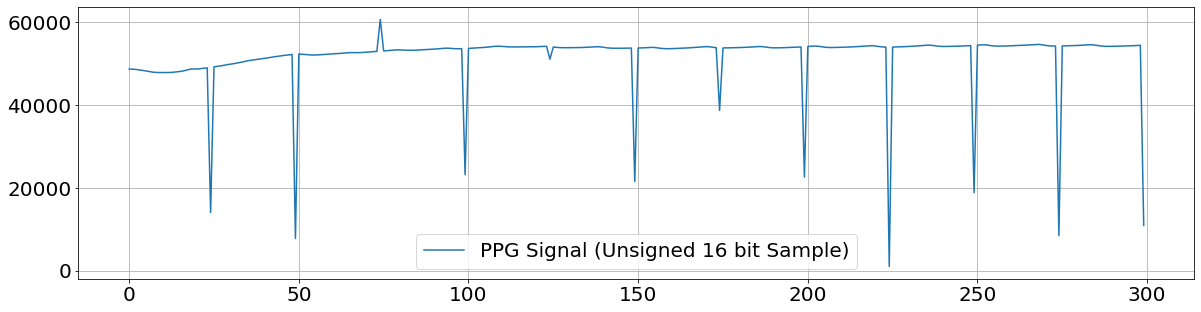

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(ppg_sig[0:300],label='PPG Signal (Unsigned 16 bit Sample)')
plt.grid()
plt.legend()

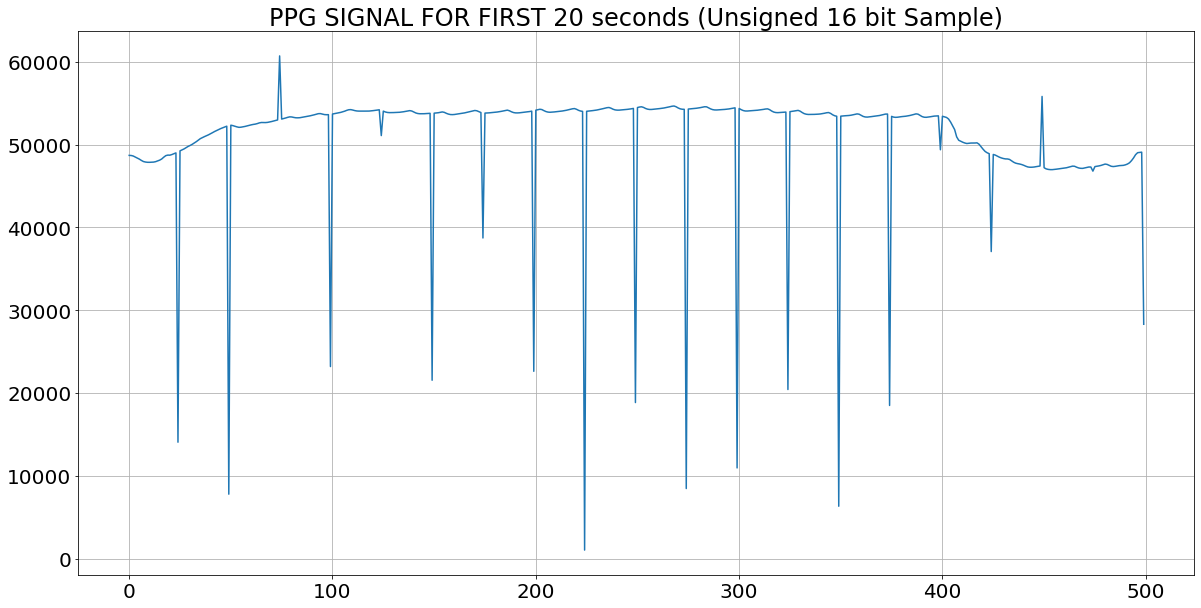

In [ ]:
plt.title('PPG SIGNAL FOR FIRST 20 seconds (Unsigned 16 bit Sample)')
plt.plot(ppg_sig[0:int(20 * 25)])
plt.grid()


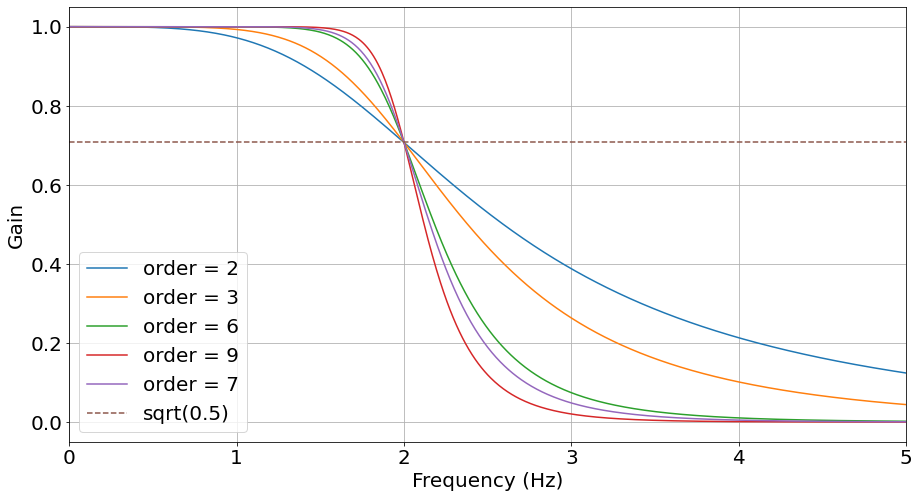

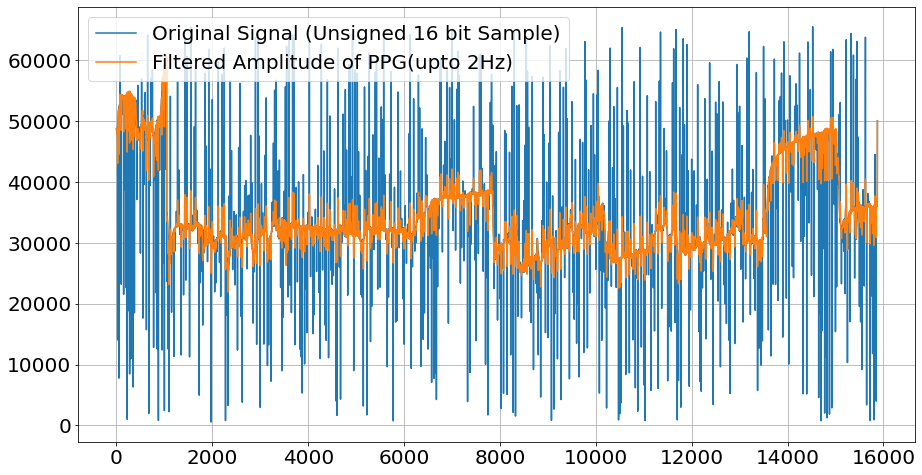

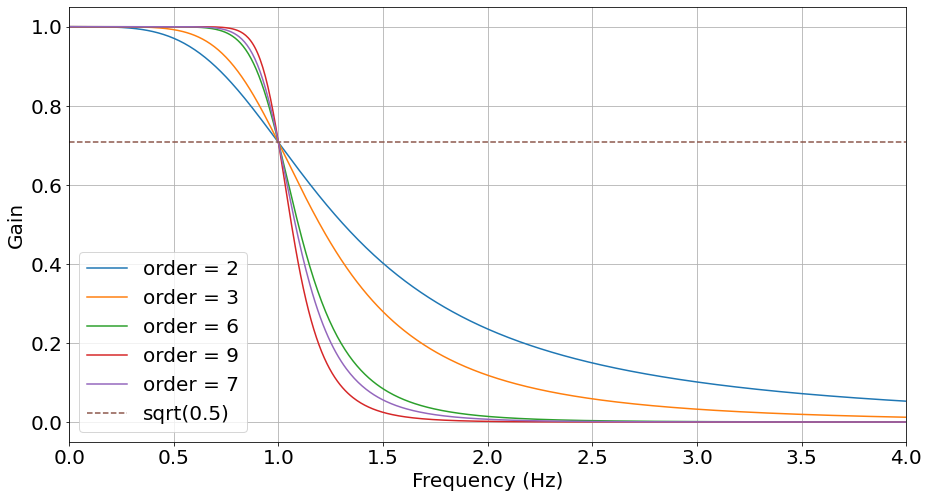

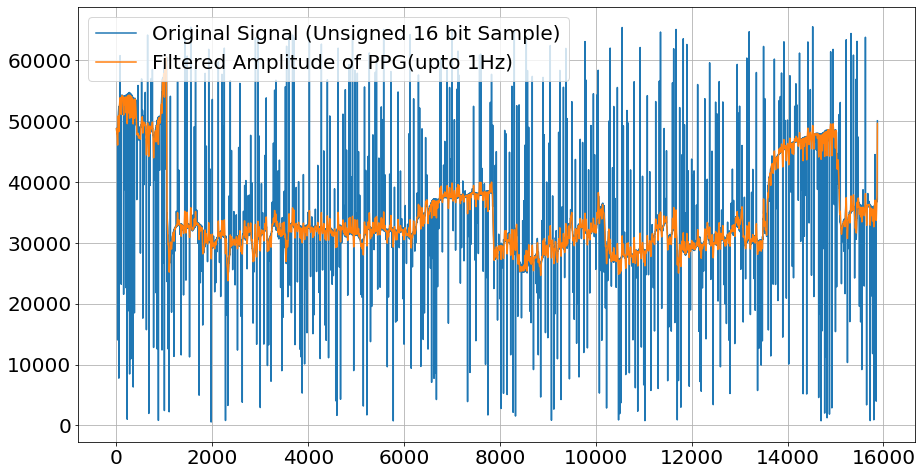

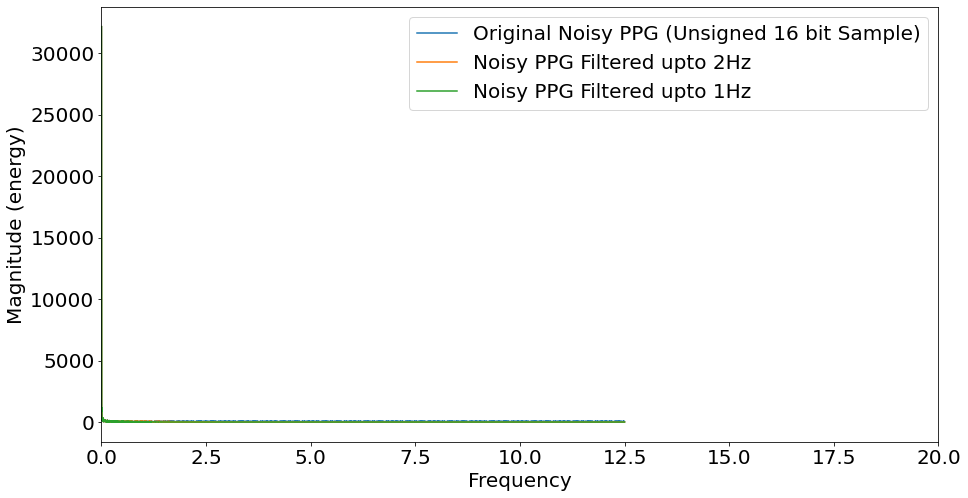

In [ ]:
from scipy.signal import butter, lfilter,filtfilt

def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, [high], btype='low')
    return b, a

def butter_lowpass_filter(data, highcut, fs, order=5):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


def run(x,T,fs,highcut,label,size=(15,8)):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # fs,highcut:-Sample rate and desired cutoff frequencies (in Hz).


    # Plot the frequency response for a few different orders.
    plt.figure(figsize=size)
    plt.clf()
    for order in [2, 3, 6, 9, 7]:
        b, a = butter_lowpass(highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.xlim([0,highcut+3])
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    # T is end time

    plt.figure(figsize=size)
    plt.clf()
    plt.plot(x, label='Original Signal (Unsigned 16 bit Sample)')

    y = butter_lowpass_filter(x, highcut, fs, order=2)
    plt.plot(y, label=label)
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

    return y

t_s=1/25
dt=1/25
ppg_lp_filt_2=run(ppg_sig,len(ppg_sig)*dt,25,2,'Filtered Amplitude of PPG(upto 2Hz)')
ppg_lp_filt_1=run(ppg_sig,len(ppg_sig)*dt,25,1,'Filtered Amplitude of PPG(upto 1Hz)')
plt.figure(figsize=(15,8))
plt.magnitude_spectrum(ppg_sig,1/t_s,label='Original Noisy PPG (Unsigned 16 bit Sample)')
plt.xlim([0,20])
b=plt.magnitude_spectrum(ppg_lp_filt_2,25,label='Noisy PPG Filtered upto 2Hz')
c=plt.magnitude_spectrum(ppg_lp_filt_1,25,label='Noisy PPG Filtered upto 1Hz')
plt.legend()

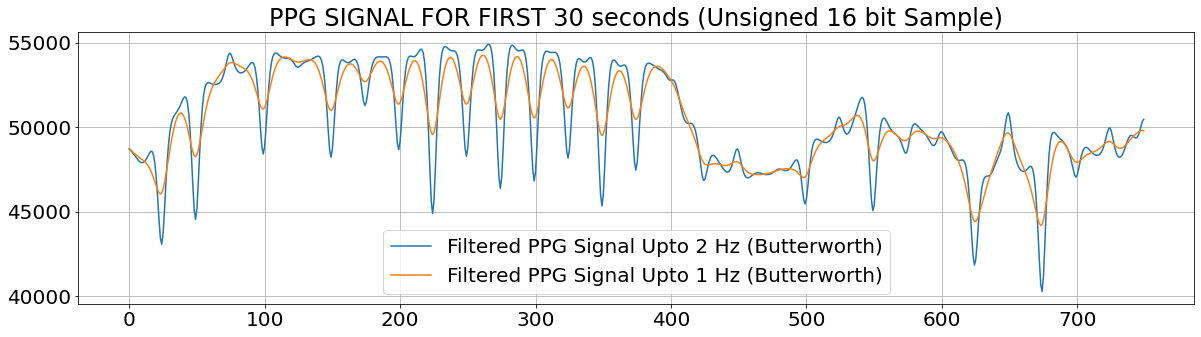

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 30 seconds (Unsigned 16 bit Sample)')
# plt.plot(ppg_sig[0:30*25],label='Original Noisy PPG Signal')
plt.plot(ppg_lp_filt_2[0:30*25],label='Filtered PPG Signal Upto 2 Hz (Butterworth)')
plt.plot(ppg_lp_filt_1[0:30*25],label='Filtered PPG Signal Upto 1 Hz (Butterworth)')
plt.grid()
plt.legend()

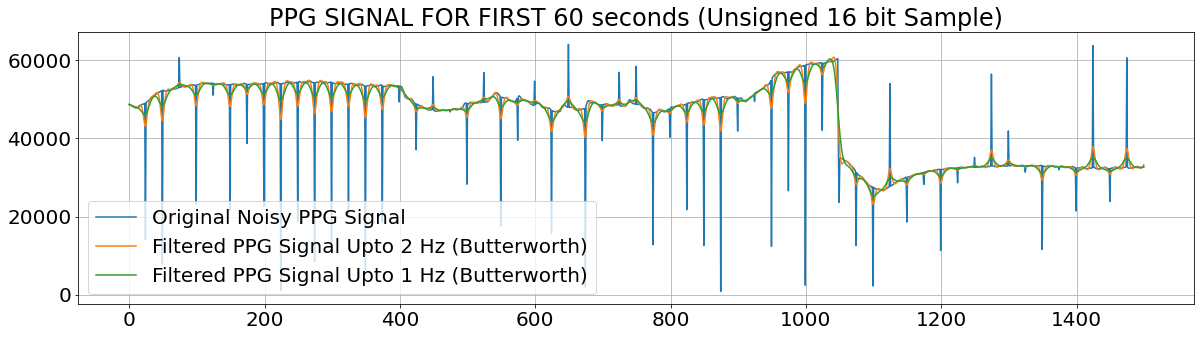

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 60 seconds (Unsigned 16 bit Sample)')
plt.plot(ppg_sig[0:60*25],label='Original Noisy PPG Signal')
plt.plot(ppg_lp_filt_2[0:60*25],label='Filtered PPG Signal Upto 2 Hz (Butterworth)')
plt.plot(ppg_lp_filt_1[0:60*25],label='Filtered PPG Signal Upto 1 Hz (Butterworth)')
plt.grid()
plt.legend()

In [ ]:
!pip install chart-studio

     |████████████████████████████████| 71kB 5.8MB/s 


In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

trace1 = go.Scatter(
    x=list(range(len(ppg_sig))),
    y=ppg_sig,
    mode='lines',
    name='Noisy PPG Data (Unsigned 16 bit Sample)'
)

layout = go.Layout(
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
fig.show()

fc = 0.1 #1.25Hz
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)

sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)


new_signal = np.convolve(ppg_sig, sinc_func)

trace1 = go.Scatter(
    x=list(range(len(new_signal))),
    y=new_signal,
    mode='lines',
    name='Low-Pass Filter (Unsigned 16 bit Sample) upto 1.25Hz',
    marker=dict(
        color='#C54C82'
    )
)

layout = go.Layout(
    title='Low-Pass Filter (Unsigned 16 bit Sample)',
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
fig.show()

In [ ]:
fc = 0.2
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)

sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = np.blackman(N)
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

# reverse function
sinc_func = -sinc_func
sinc_func[int((N - 1) / 2)] += 1

new_signal = np.convolve(ppg_sig, sinc_func)

trace1 = go.Scatter(
    x=list(range(len(new_signal))),
    y=new_signal,
    mode='lines',
    name='High-Pass Filter',
    marker=dict(
        color='#424242'
    )
)

layout = go.Layout(
    title='High-Pass Filtered PPG signal (Unsigned 16 bit Sample) After 2.5Hz',
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
fig.show()

In [ ]:
fL = 0.002 # 0.25Hz
fH = 0.2 # 2.5Hz
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # Make sure that N is odd.
n = np.arange(N)

# low-pass filter
hlpf = np.sinc(2 * fH * (n - (N - 1) / 2.))
hlpf *= np.blackman(N)
hlpf = hlpf / np.sum(hlpf)

# high-pass filter
hhpf = np.sinc(2 * fL * (n - (N - 1) / 2.))
hhpf *= np.blackman(N)
hhpf = hhpf / np.sum(hhpf)
hhpf = -hhpf
hhpf[int((N - 1) / 2)] += 1

h = np.convolve(hlpf, hhpf)
new_signal = np.convolve(ppg_sig, h)

trace1 = go.Scatter(
    x=list(range(len(new_signal))),
    y=new_signal,
    mode='lines',
    name='Band-Pass Filter',
    marker=dict(
        color='#BB47BE'
    )
)

layout = go.Layout(
    title='Band-Pass Filtered PPG signal (0.25Hz to 2.5Hz) (Unsigned 16 bit Sample)',
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
fig.show()

In [ ]:
def butter_lowpass(cutoff, sample_rate, order=2):
    '''standard lowpass filter.

    Function that defines standard Butterworth lowpass filter

    Parameters
    ----------
    cutoff : int or float
        frequency in Hz that acts as cutoff for filter.
        All frequencies above cutoff are filtered out.

    sample_rate : int or float
        sample rate of the supplied signal

    order : int
        filter order, defines the strength of the roll-off
        around the cutoff frequency. Typically orders above 6
        are not used frequently.
        default: 2

    Returns
    -------
    out : tuple
        numerator and denominator (b, a) polynomials
        of the defined Butterworth IIR filter.

    Examples
    --------
    >>> b, a = butter_lowpass(cutoff = 2, sample_rate = 100, order = 2)
    >>> b, a = butter_lowpass(cutoff = 4.5, sample_rate = 12.5, order = 5)
    '''
    nyq = 0.5 * sample_rate
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_highpass(cutoff, sample_rate, order=2):
    '''standard highpass filter.

    Function that defines standard Butterworth highpass filter

    Parameters
    ----------
    cutoff : int or float
        frequency in Hz that acts as cutoff for filter.
        All frequencies below cutoff are filtered out.

    sample_rate : int or float
        sample rate of the supplied signal

    order : int
        filter order, defines the strength of the roll-off
        around the cutoff frequency. Typically orders above 6
        are not used frequently.
        default : 2

    Returns
    -------
    out : tuple
        numerator and denominator (b, a) polynomials
        of the defined Butterworth IIR filter.

    Examples
    --------
    we can specify the cutoff and sample_rate as ints or floats.

    >>> b, a = butter_highpass(cutoff = 2, sample_rate = 100, order = 2)
    >>> b, a = butter_highpass(cutoff = 4.5, sample_rate = 12.5, order = 5)
    '''
    nyq = 0.5 * sample_rate
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a


def butter_bandpass(lowcut, highcut, sample_rate, order=2):
    '''standard bandpass filter.
    Function that defines standard Butterworth bandpass filter.
    Filters out frequencies outside the frequency range
    defined by [lowcut, highcut].

    Parameters
    ----------
    lowcut : int or float
        Lower frequency bound of the filter in Hz

    highcut : int or float
        Upper frequency bound of the filter in Hz

    sample_rate : int or float
        sample rate of the supplied signal

    order : int
        filter order, defines the strength of the roll-off
        around the cutoff frequency. Typically orders above 6
        are not used frequently.
        default : 2

    Returns
    -------
    out : tuple
        numerator and denominator (b, a) polynomials
        of the defined Butterworth IIR filter.

    Examples
    --------
    we can specify lowcut, highcut and sample_rate as ints or floats.

    >>> b, a = butter_bandpass(lowcut = 1, highcut = 6, sample_rate = 100, order = 2)
    >>> b, a = butter_bandpass(lowcut = 0.4, highcut = 3.7, sample_rate = 72.6, order = 2)
    '''
    nyq = 0.5 * sample_rate
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def filter_signal(data, cutoff, sample_rate, order=2, filtertype='lowpass',
                  return_top = False):
    '''Apply the specified filter

    Function that applies the specified lowpass, highpass or bandpass filter to
    the provided dataset.

    Parameters
    ----------
    data : 1-dimensional numpy array or list
        Sequence containing the to be filtered data

    cutoff : int, float or tuple
        the cutoff frequency of the filter. Expects float for low and high types
        and for bandpass filter expects list or array of format [lower_bound, higher_bound]

    sample_rate : int or float
        the sample rate with which the passed data sequence was sampled

    order : int
        the filter order
        default : 2

    filtertype : str
        The type of filter to use. Available:
        - lowpass : a lowpass butterworth filter
        - highpass : a highpass butterworth filter
        - bandpass : a bandpass butterworth filter
        - notch : a notch filter around specified frequency range
        both the highpass and notch filter are useful for removing baseline wander. The notch
        filter is especially useful for removing baseling wander in ECG signals.


    Returns
    -------
    out : 1d array
        1d array containing the filtered data

    Examples
    --------
    >>> import numpy as np
    >>> import heartpy as hp

    Using standard data provided

    >>> data, _ = hp.load_exampledata(0)

    We can filter the signal, for example with a lowpass cutting out all frequencies
    of 5Hz and greater (with a sloping frequency cutoff)

    >>> filtered = filter_signal(data, cutoff = 5, sample_rate = 100.0, order = 3, filtertype='lowpass')
    >>> print(np.around(filtered[0:6], 3))
    [530.175 517.893 505.768 494.002 482.789 472.315]

    Or we can cut out all frequencies below 0.75Hz with a highpass filter:

    >>> filtered = filter_signal(data, cutoff = 0.75, sample_rate = 100.0, order = 3, filtertype='highpass')
    >>> print(np.around(filtered[0:6], 3))
    [-17.975 -28.271 -38.609 -48.992 -58.422 -67.902]

    Or specify a range (here: 0.75 - 3.5Hz), outside of which all frequencies
    are cut out.

    >>> filtered = filter_signal(data, cutoff = [0.75, 3.5], sample_rate = 100.0,
    ... order = 3, filtertype='bandpass')
    >>> print(np.around(filtered[0:6], 3))
    [-12.012 -23.159 -34.261 -45.12  -55.541 -65.336]

    A 'Notch' filtertype is also available (see remove_baseline_wander).

    >>> filtered = filter_signal(data, cutoff = 0.05, sample_rate = 100.0, filtertype='notch')

    Finally we can use the return_top flag to only return the filter response that
    has amplitute above zero. We're only interested in the peaks, and sometimes
    this can improve peak prediction:

    >>> filtered = filter_signal(data, cutoff = [0.75, 3.5], sample_rate = 100.0,
    ... order = 3, filtertype='bandpass', return_top = True)
    >>> print(np.around(filtered[48:53], 3))
    [ 0.     0.     0.409 17.088 35.673]
    '''
    if filtertype.lower() == 'lowpass':
        b, a = butter_lowpass(cutoff, sample_rate, order=order)
    elif filtertype.lower() == 'highpass':
        b, a = butter_highpass(cutoff, sample_rate, order=order)
    elif filtertype.lower() == 'bandpass':
        assert type(cutoff) == tuple or list or np.array, 'if bandpass filter is specified, \
cutoff needs to be array or tuple specifying lower and upper bound: [lower, upper].'
        b, a = butter_bandpass(cutoff[0], cutoff[1], sample_rate, order=order)
    elif filtertype.lower() == 'notch':
        b, a = iirnotch(cutoff, Q = 0.005, fs = sample_rate)
    else:
        raise ValueError('filtertype: %s is unknown, available are: \
lowpass, highpass, bandpass, and notch' %filtertype)

    filtered_data = filtfilt(b, a, data)

    if return_top:
        return np.clip(filtered_data, a_min = 0, a_max = None)
    else:
        return filtered_data

In [ ]:
ppg_1_2_5_butter=filter_signal(ppg_sig,[1,2.5],25,order=2,filtertype='bandpass')
ppg_1_3_butter=filter_signal(ppg_sig,[1,3],25,order=2,filtertype='bandpass')
ppg_1_5_butter=filter_signal(ppg_sig,[1,5],25,order=2,filtertype='bandpass')

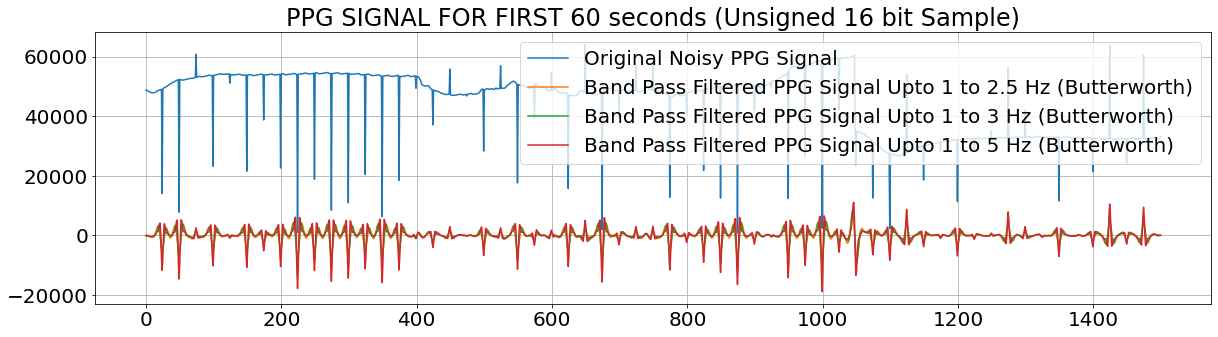

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 60 seconds (Unsigned 16 bit Sample)')
plt.plot(ppg_sig[0:60*25],label='Original Noisy PPG Signal')
plt.plot(ppg_1_2_5_butter[0:60*25],label='Band Pass Filtered PPG Signal Upto 1 to 2.5 Hz (Butterworth)')
plt.plot(ppg_1_3_butter[0:60*25],label='Band Pass Filtered PPG Signal Upto 1 to 3 Hz (Butterworth)')
plt.plot(ppg_1_5_butter[0:60*25],label='Band Pass Filtered PPG Signal Upto 1 to 5 Hz (Butterworth)')
plt.grid()

plt.legend(loc='upper right')

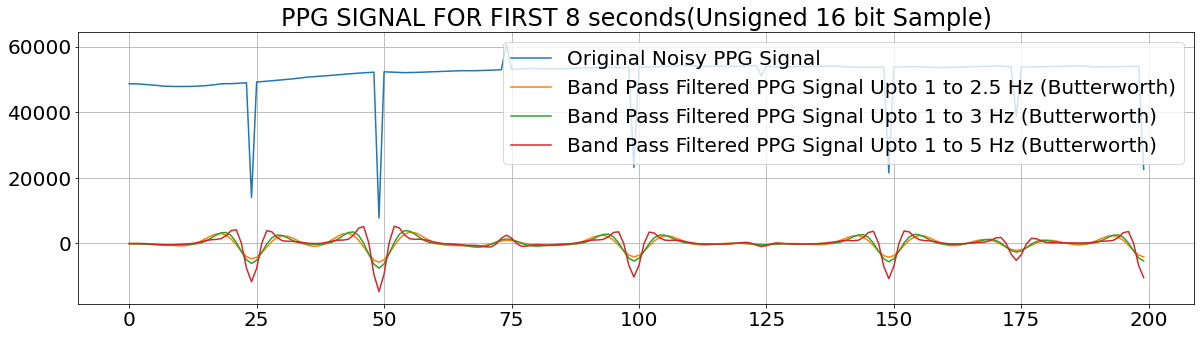

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 8 seconds(Unsigned 16 bit Sample)')
plt.plot(ppg_sig[0:8*25],label='Original Noisy PPG Signal')
plt.plot(ppg_1_2_5_butter[0:8*25],label='Band Pass Filtered PPG Signal Upto 1 to 2.5 Hz (Butterworth)')
plt.plot(ppg_1_3_butter[0:8*25],label='Band Pass Filtered PPG Signal Upto 1 to 3 Hz (Butterworth)')
plt.plot(ppg_1_5_butter[0:8*25],label='Band Pass Filtered PPG Signal Upto 1 to 5 Hz (Butterworth)')
plt.grid()

plt.legend(loc='upper right')

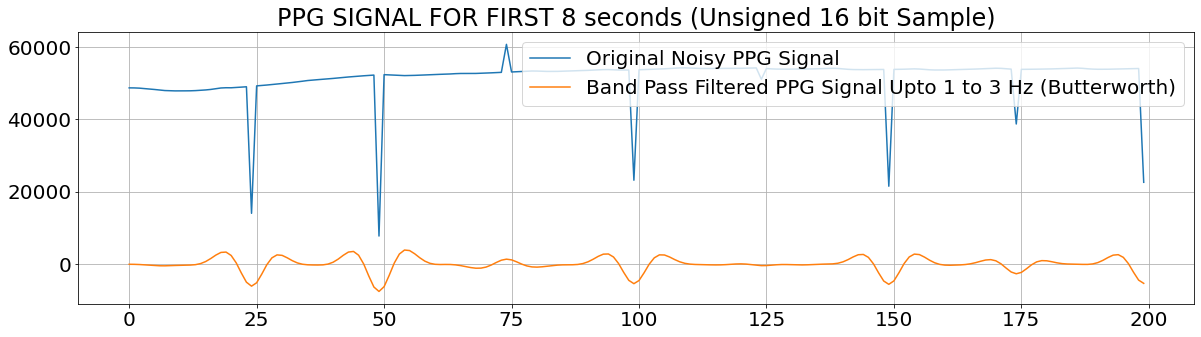

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 8 seconds (Unsigned 16 bit Sample)')
plt.plot(ppg_sig[0:8*25],label='Original Noisy PPG Signal')
plt.plot(ppg_1_3_butter[0:8*25],label='Band Pass Filtered PPG Signal Upto 1 to 3 Hz (Butterworth)')
plt.grid()

plt.legend(loc='upper right')

In [ ]:

from scipy.signal import butter, filtfilt, iirnotch, savgol_filter
def smooth_signal(data, sample_rate, window_length=None, polyorder=3):
    '''smooths given signal using savitzky-golay filter

    Function that smooths data using savitzky-golay filter using default settings.

    Functionality requested by Eirik Svendsen. Added since 1.2.4

    Parameters
    ----------
    data : 1d array or list
        array or list containing the data to be filtered

    sample_rate : int or float
        the sample rate with which data is sampled

    window_length : int or None
        window length parameter for savitzky-golay filter, see Scipy.signal.savgol_filter docs.
        Must be odd, if an even int is given, one will be added to make it uneven.
        default : 0.1  * sample_rate

    polyorder : int
        the order of the polynomial fitted to the signal. See scipy.signal.savgol_filter docs.
        default : 3

    Returns
    -------
    smoothed : 1d array
        array containing the smoothed data

    Examples
    --------
    Given a fictional signal, a smoothed signal can be obtained by smooth_signal():

    >>> x = [1, 3, 4, 5, 6, 7, 5, 3, 1, 1]
    >>> smoothed = smooth_signal(x, sample_rate = 2, window_length=4, polyorder=2)
    >>> np.around(smoothed[0:4], 3)
    array([1.114, 2.743, 4.086, 5.   ])

    If you don't specify the window_length, it is computed to be 10% of the
    sample rate (+1 if needed to make odd)
    >>> import heartpy as hp
    >>> data, timer = hp.load_exampledata(0)
    >>> smoothed = smooth_signal(data, sample_rate = 100)

    '''

    if window_length == None:
        window_length = sample_rate // 10

    if window_length % 2 == 0 or window_length == 0: window_length += 1

    smoothed = savgol_filter(data, window_length = window_length,
                             polyorder = polyorder)

    return smoothed

In [ ]:
ppg_smoothed=smooth_signal(ppg_sig,25,6)

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 60 seconds (Unsigned 16 bit Sample)')
plt.plot(ppg_sig[0:60*25],label='Original Noisy PPG Signal')
plt.plot(ppg_smoothed[0:60*25],label='Smoothed PPG Signal using savitzky-golay filter')
plt.grid()

plt.legend(loc='upper right')

In [ ]:
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 8 seconds (Unsigned 16 bit Sample)')
plt.plot(ppg_sig[0:8*25],label='Original Noisy PPG Signal')
plt.plot(ppg_smoothed[0:8*25],label='Smoothed PPG Signal using savitzky-golay filter')
plt.grid()

plt.legend(loc='upper right')

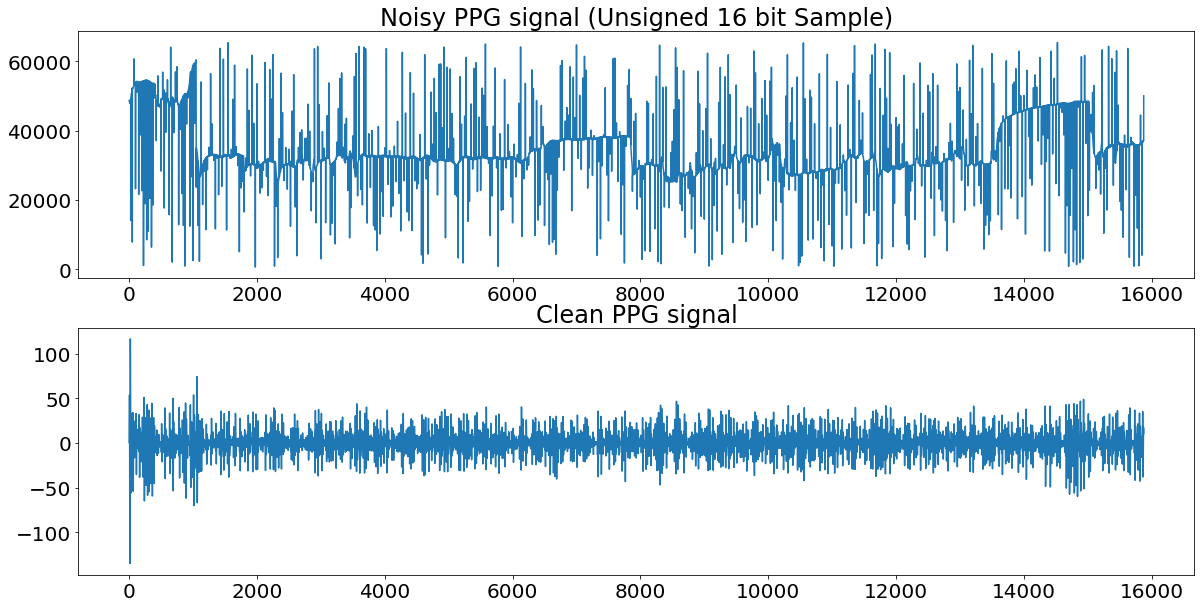

In [ ]:
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt## A high pass filter allows frequencies higher than a cut-off value
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False, output='ba')
    return b, a## A low pass filter allows frequencies lower than a cut-off valuedef butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False, output='ba')
    return b, a
def notch_filter(cutoff, q):
    nyq = 0.5*fs
    freq = cutoff/nyq
    b, a = iirnotch(freq, q)
    return b, a

def highpass(data, fs, order=5):
    b,a = butter_highpass(cutoff_high, fs, order=order)
    x = lfilter(b,a,data)
    return x

def lowpass(data, fs, order =5):
    b,a = butter_lowpass(cutoff_low, fs, order=order)
    y = lfilter(b,a,data)
    return y

def notch(data, powerline, q):
    b,a = notch_filter(powerline,q)
    z = lfilter(b,a,data)
    return z

def final_filter(data, fs, order=5):
    b, a = butter_highpass(cutoff_high, fs, order=order)
    x = lfilter(b, a, data)
    d, c = butter_lowpass(cutoff_low, fs, order = order)
    y = lfilter(d, c, x)
    f, e = notch_filter(powerline, 30)
    z = lfilter(f, e, y)
    return z

fs = 25
cutoff_low = 1
cutoff_high=2.5
powerline = 6
order = 5

plt.figure(1)
ax1 = plt.subplot(211)
plt.plot(ppg_sig)
ax1.set_title("Noisy PPG signal (Unsigned 16 bit Sample)")

filter_signal = final_filter(ppg_sig, fs, order)
ax2 = plt.subplot(212)
plt.plot(filter_signal)
ax2.set_title("Clean PPG signal")
plt.show()

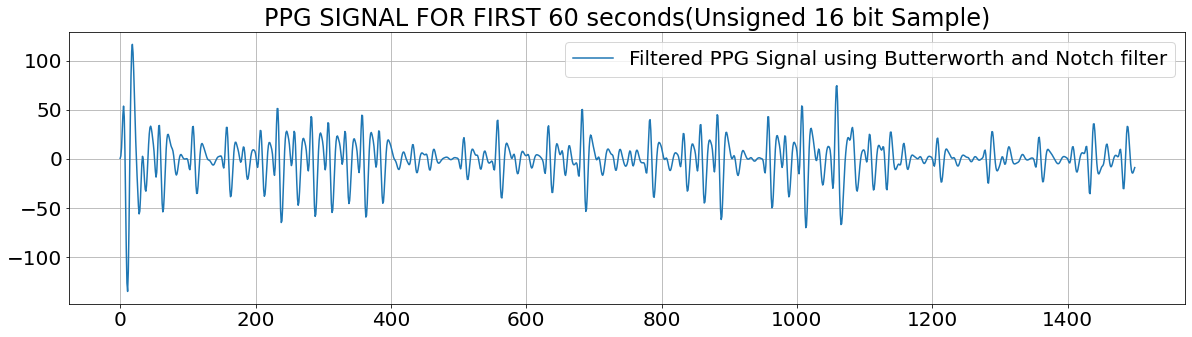

In [ ]:

filter_signal = final_filter(ppg_sig, fs, order)
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 60 seconds(Unsigned 16 bit Sample)')
# plt.plot(ppg_sig[0:60*25],label='Original Noisy PPG Signal')
plt.plot(filter_signal[0:60*25],label='Filtered PPG Signal using Butterworth and Notch filter')
plt.grid()

plt.legend(loc='upper right')

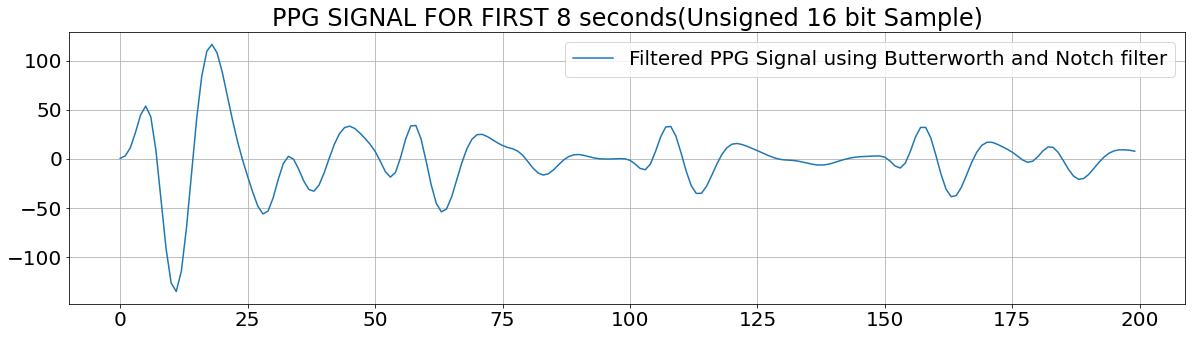

In [ ]:

filter_signal = final_filter(ppg_sig, fs, order)
plt.figure(figsize=(20,5))
plt.title('PPG SIGNAL FOR FIRST 8 seconds(Unsigned 16 bit Sample)')
# plt.plot(ppg_sig[0:8*25],label='Original Noisy PPG Signal')
plt.plot(filter_signal[0:8*25],label='Filtered PPG Signal using Butterworth and Notch filter')
plt.grid()

plt.legend(loc='upper right')